# Configure font

In [1]:
# Configure Arial as the default font in all figures

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


arial_font_path = '/PATH/TO/ARIAL/FONT/arial.ttf'

fm.fontManager.addfont(arial_font_path)

plt.rcParams['font.family'] = 'Arial'

# Path to Zenodo files folder

In [1]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure 2

## Panel A

### Load the data

In [3]:
# Define WT sequences

proteins = {'P0A9X9': 'CspA',
            'P01053': 'CI-2A',
            'P06241': 'FYN-SH3'}

P0A9X9 = 'ATGACTGGTATTGTCAAATGGTTTAATGCAGATAAAGGTTTTGGTTTTATCACTCCAGATGATGGTTCTAAAGATGTCTTTGTCCATTTTTCTGCAATTCAAAATGATGGTTATAAATCTTTGGATGAAGGTCAAAAAGTCTCTTTCACTATTGAATCTGGTGCAAAAGGTCCAGCAGCAGGTAATGTCACTTCT'
P01053 = 'AAAACTGAATGGCCAGAATTGGTTGGTAAATCTGTCGAAGAAGCAAAAAAAGTTATCTTGCAAGATAAACCAGAAGCACAAATCATTGTTTTGCCAGTTGGTACTATTGTTACTATGGAATATAGAATTGATAGAGTCAGATTGTTTGTCGATAAATTGGATAATATCGCACAAGTTCCAAGAGTTGGT'
P06241 = 'ACGCTTTTCGTTGCATTGTATGATTATGAAGCAAGAACTGAAGATGATTTGTCTTTCCATAAAGGTGAAAAATTCCAAATCTTGAATTCTTCTGAAGGTGATTGGTGGGAAGCAAGATCTTTGACTACTGGTGAAACTGGTTATATCCCATCTAACTATGTCGCGCCTGTG'

prots=[P0A9X9,P01053,P06241]


In [4]:
# Load data

import pandas as pd

allvariants = pd.read_csv(path+"Fig2/Sparse_DTS_Cores_fitness_replicates.txt",
                         sep='\t', lineterminator='\n', low_memory = False)

allvariants = allvariants.sort_values('fitness', ascending = False)

# De-multiplex each protein's variants

ID_dict =  {'MT' : 'P0A9X9',
           'KT' : 'P01053',
           'TL' : 'P06241'}

allvariants["Protein"] = pd.Series(dtype="object") 
for index, row in allvariants.iterrows():
    try:
        allvariants.at[index,'Protein']=ID_dict[row.aa_seq[:2]]
    except KeyError:
        continue

allvariants = allvariants.loc[allvariants['Protein'].notnull()].copy()
allvariants

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,sigma2_uncorr,fitness,sigma,growthrate1,growthrate1_sigma,growthrate2,growthrate2_sigma,growthrate,growthrate_sigma,Protein
9873,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,50,...,0.149981,0.119072,0.141862,0.239689,0.030180,0.226946,0.009375,0.232834,0.009311,P06241
2746,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,2.0,NaN,NaN,False,False,False,270,...,0.143105,0.038189,0.118645,0.229667,0.014652,0.222635,0.008945,0.227526,0.007787,P01053
9771,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,36,...,0.164073,0.010316,0.156208,0.220078,0.035262,0.221325,0.010256,0.225696,0.010252,P06241
0,NaN,KTEWPELVGKSIEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,3.0,NaN,NaN,False,False,False,103,...,0.151908,0.006908,0.136781,0.213351,0.021711,0.223492,0.009495,0.225473,0.008977,P01053
2869,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRI...,NaN,0.0,NaN,True,False,False,False,869,...,0.140544,0.004089,0.102184,0.225144,0.010277,0.222607,0.008785,0.225288,0.006706,P01053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,141,...,0.496796,-4.493979,0.417133,-0.080343,0.053032,-0.061804,0.031054,-0.069925,0.027377,P06241
6480,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,92,...,0.687984,-4.499378,0.518747,-0.066789,0.054532,-0.072341,0.043004,-0.070280,0.034046,P06241
17285,NaN,MTGIIKWFNADKGFGFLTPDDGSKDVFIHFSAIQNDGYKSLDEGQK...,NaN,NaN,NaN,NaN,True,False,False,66,...,0.688287,-4.586210,0.688287,NaN,NaN,-0.066794,0.043023,-0.075979,0.045173,P0A9X9
14007,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,73,...,0.688254,-4.595361,0.688254,NaN,NaN,-0.067366,0.043021,-0.076579,0.045171,P06241


In [5]:
# Find core sequences

cores = {'P0A9X9' : [4,16,25,27,46,48,62],
        'P01053' : [11,18,27,45,47,49,55],
        'P06241' : [2,16,18,24,26,48,53]}

allvariants["core"] = pd.Series(dtype="object") 
for index, row in allvariants.iterrows():
    core=[]
    for i in cores[row.Protein]:
        core.append(row.aa_seq[i])
    allvariants.at[index,'core'] = ''.join(core)

In [6]:
# Define WT cores

from Bio.Seq import Seq

wt_cores = {}
for (prot_seq, prot_nam) in zip(prots, proteins.keys()):
    aa_seq=str(Seq(prot_seq).translate())
    wt_core=[]
    for i in cores[prot_nam]:
        wt_core.append(aa_seq[i])
    wt_cores[prot_nam]= ''.join(wt_core)
wt_cores

{'P0A9X9': 'VIVVVFV', 'P01053': 'VIIVLVI', 'P06241': 'FLFFIIV'}

In [7]:
# Find Hamming distance to WT

allvariants["wt_core"] = pd.Series(dtype="object") 
for index, row in allvariants.iterrows():
    wt = wt_cores[row.Protein]
    allvariants.at[index, 'wt_core']=wt
    if row.core == wt:
        allvariants.at[index, 'Nham_aa'] = 0
    else:
        allvariants.at[index, 'Nham_aa'] = sum(1 for a,b in zip(wt, row.core) if a!=b)
allvariants

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,sigma,growthrate1,growthrate1_sigma,growthrate2,growthrate2_sigma,growthrate,growthrate_sigma,Protein,core,wt_core
9873,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,50,...,0.141862,0.239689,0.030180,0.226946,0.009375,0.232834,0.009311,P06241,MLLLVVL,FLFFIIV
2746,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,3.0,NaN,NaN,False,False,False,270,...,0.118645,0.229667,0.014652,0.222635,0.008945,0.227526,0.007787,P01053,VIIIVVV,VIIVLVI
9771,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,36,...,0.156208,0.220078,0.035262,0.221325,0.010256,0.225696,0.010252,P06241,MLFLIVI,FLFFIIV
0,NaN,KTEWPELVGKSIEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,NaN,False,False,False,103,...,0.136781,0.213351,0.021711,0.223492,0.009495,0.225473,0.008977,P01053,IIIIVVV,VIIVLVI
2869,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,True,False,False,False,869,...,0.102184,0.225144,0.010277,0.222607,0.008785,0.225288,0.006706,P01053,VIFIIVV,VIIVLVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,141,...,0.417133,-0.080343,0.053032,-0.061804,0.031054,-0.069925,0.027377,P06241,VVFMMML,FLFFIIV
6480,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,7.0,NaN,NaN,True,False,False,92,...,0.518747,-0.066789,0.054532,-0.072341,0.043004,-0.070280,0.034046,P06241,IIIVLVL,FLFFIIV
17285,NaN,MTGIIKWFNADKGFGFLTPDDGSKDVFIHFSAIQNDGYKSLDEGQK...,NaN,5.0,NaN,NaN,True,False,False,66,...,0.688287,NaN,NaN,-0.066794,0.043023,-0.075979,0.045173,P0A9X9,ILVILFF,VIVVVFV
14007,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,73,...,0.688254,NaN,NaN,-0.067366,0.043021,-0.076579,0.045171,P06241,FVVLFMM,FLFFIIV


### Biological replicate correlations

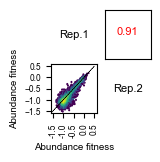

In [8]:
from scipy.stats import pearsonr
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
from seaborn import kdeplot
plt.rcParams['font.family'] = 'Arial'

warnings.filterwarnings('ignore')

def reg_coef(x,y,label=None,color=None,hue=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('{:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center', size = 8, color='red')
    ax.tick_params(right=False, top=False, left=False, bottom=False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    #ax.tick_params(axis='both', which='major', labelsize=14)

def replicate(x,**kwargs):
    ax = plt.gca()
    ax.text(.5,.5,'Rep.'+x.name[7:8],size=8,ha='center',va='center', transform=ax.transAxes)
    ax.set_axis_off()
    
def hexbin(x, y, color, **kwargs): #https://stackoverflow.com/questions/40495093/hexbin-plot-in-pairgrid-with-seaborn
    ax = plt.gca()
    cmap = sns.color_palette('viridis', as_cmap=True)
    ax.hexbin(x, y, bins='log',gridsize=50, cmap=cmap, extent=[min(x), max(x), min(y), max(y)], **kwargs, rasterized=True)
    #lims = np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])
    lims=(-2,0.5,-2,0.5)
    plt.plot(lims, lims, '--', color='k', linewidth=0.3)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_ylim(-1.6,0.6)
    ax.set_xlim(-1.6,0.6)
    ax.set_xticks(np.arange(-1.5,1,0.5),labels=np.arange(-1.5,1,0.5),rotation=90)
    ax.set_yticks(np.arange(-1.5,1,0.5))
    ax.tick_params(axis='both', which='major', labelsize=6)

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

for protein in ['P06241']:
    
    protein_variants = allvariants.loc[allvariants['Protein']==protein].copy()

    # Normalize data in the -1 to 0 range
    reference=allvariants.loc[allvariants['Protein']==protein].sort_values(['Nham_aa','fitness'], ascending=[True,False]).iloc[0]['core']
    fig = plt.figure(figsize=(0,0))
    lines = kdeplot(data=protein_variants,x='fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
    plt.close()
        
    protein_variants_scaled = protein_variants.copy()    
    
    protein_variants_scaled['fitness']=normalize(list(protein_variants_scaled['fitness']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness1_uncorr']=normalize(list(protein_variants_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness2_uncorr']=normalize(list(protein_variants_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    
    g = sns.PairGrid(protein_variants_scaled[['fitness1_uncorr', 'fitness2_uncorr', 'Protein']].dropna())
    g.map_upper(reg_coef, hue=None)
    g.map_diag(replicate)
    g.map_lower(hexbin)
    g.fig.set_size_inches(1.2,1.2)
    
    for i in range(2):
        g.axes[i, i].set_visible(False)
    
    for ax in g.axes.flatten():
        if ax.get_xlabel() != '':
            if str(ax.get_xlabel().split('_')[0][-1]) == '1':
                ax.set_xlabel('Abundance fitness', fontsize=7)
        if ax.get_ylabel() != '':
            if str(ax.get_ylabel().split('_')[0][-1]) == '1' or str(ax.get_ylabel().split('_')[0][-1]) == '3':
                ax.set_ylabel('')
            else:
                ax.set_ylabel('Abundance fitness', fontsize=7)
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig(protein+'_biol_rep_correl.svg', dpi=300, transparent=True, bbox_inches='tight')

## Panel B

### Fitness landscapes

In [9]:
import numpy as np
import matplotlib.colors as mcolors

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1, name=None):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
      name : Optional name for the colormap. If provided, the colormap
          will be registered under this name.

    Returns
    -------
      A `LinearSegmentedColormap` object.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # Regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # Shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = mcolors.LinearSegmentedColormap(name if name else "shifted", cdict)

    return newcmap
iterator_cmap=0

In [10]:
# Define all variants separated by 1 mutation

from tqdm import tqdm
from itertools import product

DTS = ['F','L','I','M','V']
a=list(product(DTS,repeat=7))



dod={}
for variant in tqdm(a, total=len(a)):
    iterator=0
    positerator=0
    singles=[]
    for i in product(variant,DTS):
        mutant = ''.join(''.join(variant[:positerator])+str(i[1])+''.join(variant[positerator+1:]))
        if (iterator/5).is_integer() == True and iterator !=0:
            positerator+=1
        iterator+=1
        if mutant != ''.join(variant):
            singles.append(mutant)
    dod[''.join(variant)]=singles


100%|██████████| 78125/78125 [00:01<00:00, 40321.52it/s]


#### P06241 - FYN-SH3

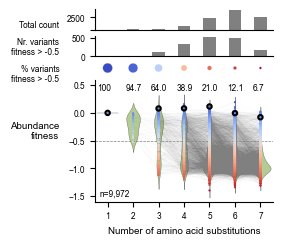

In [11]:
import seaborn as sns
import networkx as nx
from itertools import count
from seaborn import kdeplot
from itertools import groupby
import matplotlib
import numpy as np

validated_variants = {'P06241': ['FLFFVIV', 'MLFFIVL', 'MFFFVIL', 'MMFLIVF', 'LMFMLVF', 'LMVLLVL'],
                     'P01053': ['VIVVLVI', 'VIIIVVV', 'IIVIVVV', 'LMFIVVV', 'ILVIVIV'],
                     'P0A9X9': []}

protein_colors = {'P06241': '#B4D689',
                 'P01053': '#F6DCC9',
                 'P0A9X9': '#B1D9D8'}

total_core_viabilities = pd.DataFrame(columns=['protein', 'variants_above_01', 'variants_above_025', 'variants_above_05', 'variants_below_05'])
fraction_core_viabilities = pd.DataFrame(columns=['protein', 'variants_above_01', 'variants_above_025', 'variants_above_05', 'variants_below_05'])
for protein in ['P06241','P01053','P0A9X9']:
    
    protein_variants = allvariants.loc[allvariants['Protein']==protein].copy()

    # Normalize data in the -1 to 0 range
    reference=allvariants.loc[allvariants['Protein']==protein].sort_values(['Nham_aa','fitness'], ascending=[True,False]).iloc[0]['core']
    
    fig,ax = plt.subplots(figsize=(0,0))
    lines = kdeplot(data=protein_variants,x='fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
        ax.axvline(x[np.argmax(y)], ls='--')
    plt.close()
        
    protein_variants_scaled = protein_variants.copy()    
    
    protein_variants_scaled['fitness']=normalize(list(protein_variants_scaled['fitness']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness1_uncorr']=normalize(list(protein_variants_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness2_uncorr']=normalize(list(protein_variants_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})

    lowest_nham = int(protein_variants_scaled.loc[protein_variants_scaled['core']==reference].iloc[0]['Nham_aa'])

    lines = kdeplot(data=protein_variants_scaled, x='fitness', ax=ax).get_lines()
        
    for line in lines:
        x, y = line.get_data()
        mode=x[np.argmax(y)]
    
    G = nx.from_dict_of_lists(dod)
    G_val = nx.from_dict_of_lists(dod)
    
    pos={}
    for index, row in protein_variants_scaled.iterrows():
        pos[row.core] = (row.Nham_aa-lowest_nham, row.fitness)
        
    validated = validated_variants[protein]
    pos_val={}
    for index, row in protein_variants_scaled[protein_variants_scaled['core'].isin(validated)].iterrows():
        pos_val[row.core] = (row.Nham_aa-lowest_nham, row.fitness)

    fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5))
    plt.close()
    fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5),sharex=ax1)
    
    
    fig=sns.violinplot(x="Nham_aa", y="fitness", data=protein_variants_scaled, inner=None, ax=ax2, color=protein_colors[protein], linewidth=0.3)
    plt.axhline(y=-0.5, linestyle='--', color='gray', linewidth=0.5)
    
    remove=[i for i in dod.keys() if i not in pos.keys()]
    remove_val=[i for i in dod.keys() if i not in pos_val.keys()]
    
    G.remove_nodes_from(remove)
    G_val.remove_nodes_from(remove_val)
    
    fitness_values=[]
    for i in pos:
        fitness_values.append(pos[i][1])
    groups = []
    for _, g in groupby(fitness_values, lambda x: (x-1)//0.05):
        groups.append(list(g))      # Store group iterator as a list
    
    fitness_attr={}
    for node in G.nodes:
        iterator=0
        for bin in groups:
            if pos[node][1] in bin:
                fitness_attr[node]=iterator
                break
            iterator+=1
    
    nx.set_node_attributes(G, fitness_attr, 'fitness')
    groups = set(nx.get_node_attributes(G,'fitness').values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.nodes[n]['fitness']] for n in nodes]
    
    total_viable=0
    nham_viability=pd.DataFrame(columns=['Number_of_variants','Fraction_50pc_folded'])
    for nham in range(lowest_nham,8,1):
        nham_viability.at[nham,'protein']=protein
        nham_viability.at[nham,'nham']=nham
        nham_viability.at[nham,'Number_of_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])
        nham_viability.at[nham,'Fraction_50pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
        nham_viability.at[nham,'Number_of_50pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.5].index)
        nham_viability.at[nham,'Fraction_75pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
        nham_viability.at[nham,'Number_of_75pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.25].index)
        nham_viability.at[nham,'Fraction_90pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
        nham_viability.at[nham,'Number_of_90pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.1].index)
        total_viable=total_viable+len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.5].index)
    for index, row in nham_viability.iterrows():
        nham_viability.at[index,'Fraction_of_total_50pc_viable_variants']= round(100*row['Number_of_50pc_folded_variants']/total_viable,1)
    
    total_core_viabilities.at[protein,'variants_above_01']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.index)*5**7
    total_core_viabilities.at[protein,'variants_above_025']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.index)*5**7
    total_core_viabilities.at[protein,'variants_below_05']=5**7-len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)*5**7
    total_core_viabilities.at[protein,'variants_above_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)*5**7

    fraction_core_viabilities.at[protein,'variants_above_01']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.index)
    fraction_core_viabilities.at[protein,'variants_above_025']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.index)
    fraction_core_viabilities.at[protein,'variants_below_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']<=-0.5].index)/len(protein_variants_scaled.index)
    fraction_core_viabilities.at[protein,'variants_above_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)
        
    orig_cmap = plt.cm.coolwarm
    iterator_cmap+=1
    midpoint=(-0.5 - np.min(protein_variants_scaled['fitness']))/ (np.max(protein_variants_scaled['fitness']) - np.min(protein_variants_scaled['fitness']))
    shifted_cmap = shiftedColorMap(orig_cmap, midpoint=1-midpoint, name='shifted'+str(iterator_cmap))
        
    nx.draw_networkx(G, pos=pos, with_labels=False, node_size=0, ax=ax2, edge_color='gray', width=0.01)
    nodes=nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=0.3, cmap=shifted_cmap)
    nx.draw_networkx(G_val, pos=pos_val, with_labels=False, node_size=10, ax=ax2, width=0, node_shape=matplotlib.markers.MarkerStyle(marker='o', fillstyle='none'), node_color='k')
    ax2.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax2.set_xlabel('Number of amino acid substitutions', fontsize=7)
    ax2.set_ylabel("Abundance\nfitness", fontsize=7,rotation='horizontal', ha='right')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.tick_params(axis='both', which='major', labelsize=6)
    
    nham_viability['Fraction_50pc_folded'] = pd.to_numeric(nham_viability['Fraction_50pc_folded'], errors='coerce')
    sns.scatterplot(x=[i-lowest_nham for i in nham_viability['nham']],y=[0]*len(nham_viability.index), hue=nham_viability['Fraction_50pc_folded'].astype(float),palette='coolwarm_r', s=nham_viability['Fraction_50pc_folded']*0.5, legend=False,ax=ax1)
    ax1.spines[['top','right','left','bottom']].set_visible(False)
    ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False,top=False, right=False)
    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    for index, row in nham_viability.iterrows():
        if row.Fraction_50pc_folded == 100.0:
            ax2.annotate(100, (row.nham-lowest_nham-0.4,0.4), fontsize=6, color='black')
        else:
            ax2.annotate(row.Fraction_50pc_folded, (row.nham-lowest_nham-0.3,0.4), fontsize=6, color='black')
    ax1.set_ylabel('% variants\nfitness > -0.5',fontsize=6,rotation='horizontal', ha='right')
            
    ax2.annotate('n='+f"{len(protein_variants_scaled):,}", (-0.3,-1.5), fontsize=6)
    plt.subplots_adjust(hspace=0.05)
    
    nham_viability['Number_of_variants'].plot.bar(ax=ax0,fontsize=6,color='gray')
    ax0.spines[['top','right']].set_visible(False)
    ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax0.set_ylabel('Total count',fontsize=6, rotation='horizontal', ha='right')
    labels = ax0.get_yticklabels()
    labels[0] = ""
    ax0.set_yticklabels(labels)
    
    nham_viability['Number_of_50pc_folded_variants'].plot.bar(ax=axviable,fontsize=6,color='gray')
    axviable.spines[['top','right']].set_visible(False)
    axviable.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axviable.set_ylabel('Nr. variants\nfitness > -0.5',fontsize=6,rotation='horizontal', ha='right')
    
    ax0.get_yaxis().set_label_coords(-0.2,0)
    axviable.get_yaxis().set_label_coords(-0.2,0)
    ax1.get_yaxis().set_label_coords(-0.2,-1)
    ax2.get_yaxis().set_label_coords(-0.2,0.5)
    plt.ylim(-1.6,0.6)
    plt.xlim(-0.5,7-lowest_nham+0.5)
    plt.rcParams['svg.fonttype'] = 'none'
    if protein != 'P06241':
        plt.close()
#    plt.savefig(protein+'_fitness_distri.png', dpi=300, transparent=True, bbox_inches='tight')



## Panel C

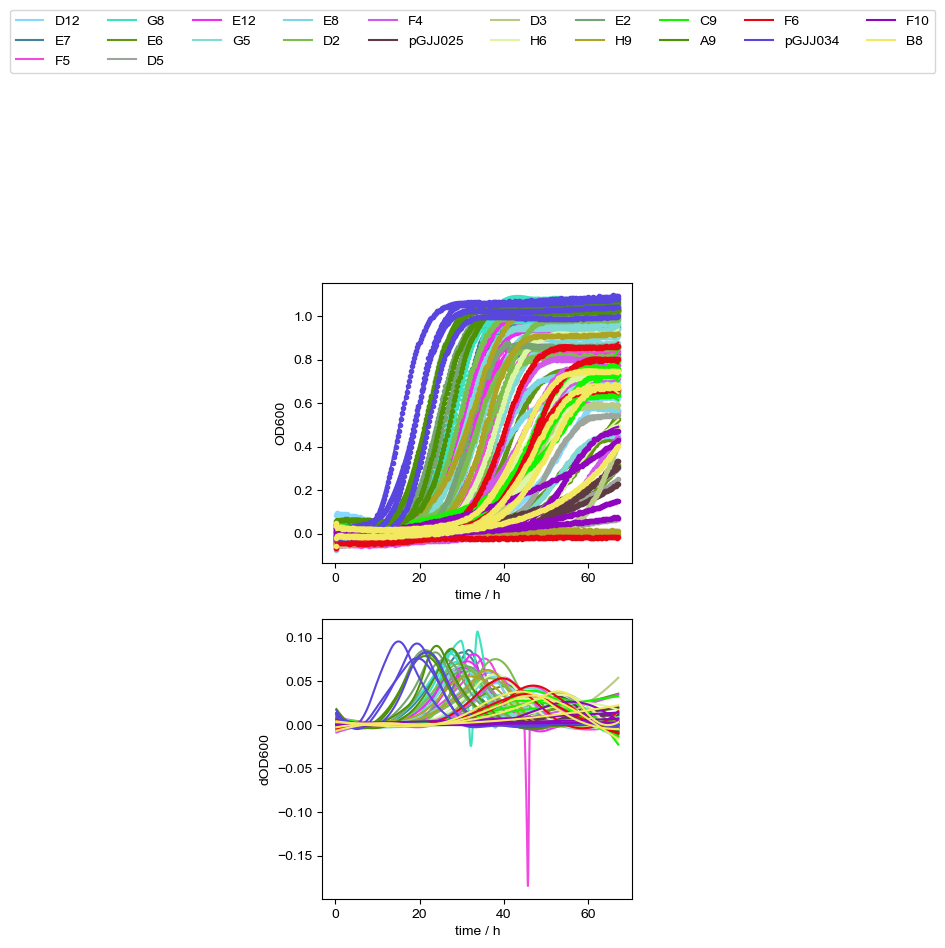

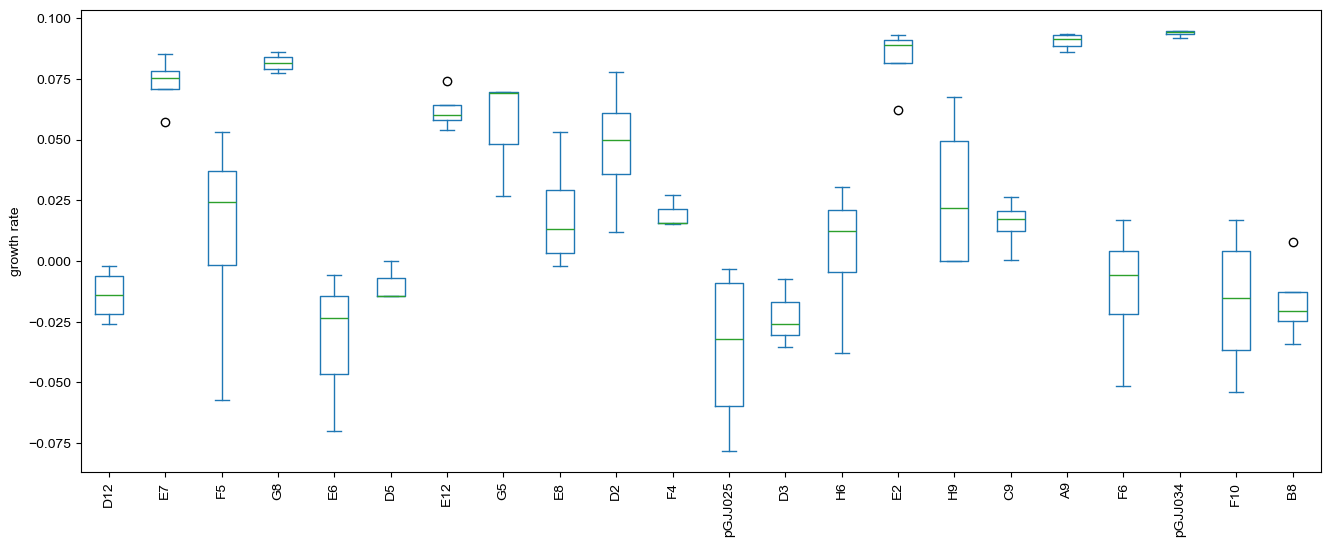

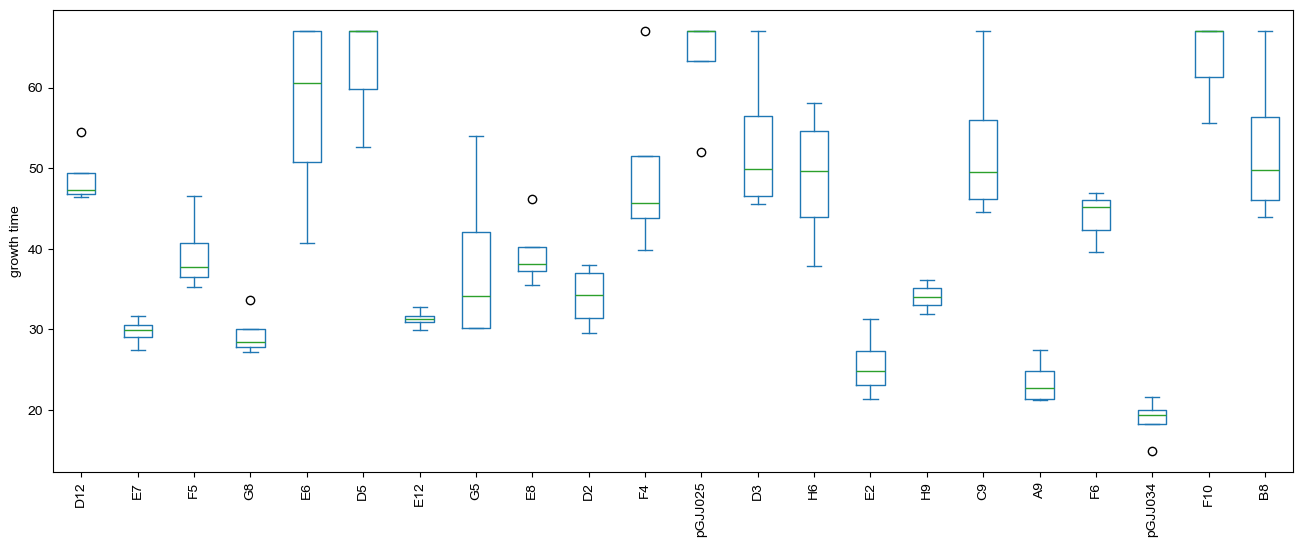

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
import math

data=pd.read_csv(path+"Fig2/Sparse_cores_DTS_Tecan.txt", header=0, delim_whitespace=True)
final_cycle_col=len(data.columns)-1
data2=data
data2=data2.drop(data2.index[[0,1]])
data2.index=data2.Cycle
data2 = data2.drop('Cycle', axis=1)
plasmid_info=pd.read_csv(path+"Fig2/Sparse_cores_DTS_Tecan_randomization.txt", header=0, delim_whitespace=True)
plasmid_info.index=plasmid_info.well
plasmid_info = plasmid_info.drop('well',axis=1)
data2= pd.concat([data2, plasmid_info], axis=1)

blanks = data2.loc[data2['plasmid'] == 'blank']
blanks = pd.DataFrame(blanks.iloc[:,:-1].mean().to_dict(),index=[blanks.index.values[-1]])
blanks = blanks.reset_index()
del blanks['index']

data2 = data2.drop('plasmid', axis=1)

data3 = pd.DataFrame(columns=np.arange(1,final_cycle_col+1,1))
for index, row in data2.iterrows():
    a=list(row-blanks.loc[0])
    data3.loc[index]=a


data3= pd.concat([data3, plasmid_info], axis=1)
#data3 = data3.drop('rand', 1)    

data.index=data.Cycle
data = data.drop('Cycle', axis=1)

cols=np.arange(1,final_cycle_col+1,1)
time=[]
for i,j in zip(data.iloc[0],cols):
    time.append(int(j)*921.3/3600)

to_plot = list(plasmid_info['plasmid'].unique())[:-4]
rows = pd.DataFrame(columns=np.arange(1,final_cycle_col+1,1))
for i in to_plot:
    rows = pd.concat([rows, data3.loc[data3['plasmid'] == i]], axis=0)
    
plt.figure(figsize=(4,8))
plasmids=[]
colors=[]
for index,row in rows.iterrows():
    if row['plasmid'] not in plasmids:
        plasmids.append(row['plasmid'])
        r = lambda: random.randint(0,255)
        colors.append('#%02X%02X%02X' % (r(),r(),r()))
    row = row.drop(['plasmid'])
    row.index=time
    #if max(row) > 0.8:
    #    pass
    #else:
    x = time
    y = row[:]
    y_spl = UnivariateSpline(x,y, s=0.02)
    l = final_cycle_col
    x_range = np.linspace(x[0],x[l-1],1000)
    plt.subplot(211)
    plt.plot(x,y, 'o', markersize=3, c=colors[-1], label=plasmids[-1])
    plt.plot(x_range, y_spl(x_range), '-', c=colors[-1], label=plasmids[-1])
    plt.xlabel('time / h')
    plt.ylabel('OD600')
    #plt.ylim(0,0.5)
    #Derivative  
    deriv = y_spl.derivative()(x_range)
    #2nd Derivative  
    secnd_deriv = y_spl.derivative(n=2)(x_range)
    #Plot derivative
    plt.subplot(212)
    plt.plot(x_range, deriv, c=colors[-1], label=plasmids[-1])
    plt.xlabel('time / h')
    plt.ylabel('dOD600')
    dmax = max(deriv)
    if dmax > 0.005:
        cp = x_range[np.argmax(deriv)]
    else:
        cp = np.nan
    data3.at[index,'growth_t']=cp
    try:
        data3.at[index,'growthrate']=math.log(y_spl(x_range[np.argmax(deriv)])/y_spl(x_range)[0])/cp
    except ValueError:
        data3.at[index,'growthrate']=math.log(y_spl(x_range[np.argmax(deriv)])/(-1*y_spl(x_range)[0]))/cp

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor = (2, 3.2),ncol=10)
plt.show()

for index, row in data3.iterrows():
    slope = 0
    if max(row[:-3]) > 0.1:
        b=max(row[:-3])
        a = min(i for i in row[:row[row == b].index[0]] if i > 0.05)
        odt1=row[row == a].index[0]
        if max(row[:row[row == b].index[0]]) < 0.3:
            a = max(row[:row[row == b].index[0]])
            odt2=row[row == a].index[0]-1
        else:
            a = min(i for i in row[:row[row == b].index[0]] if i > 0.3)
            odt2=row[row == a].index[0]-1
        odt1=1
        odt2=time.index(30.71)
        delta_t=(data.loc['Time'][odt2]-data.loc['Time'][odt1-1])/3600
        try:
            slope=math.log(row[odt2]/0.05)/delta_t
        except ValueError:
            continue
    data3.at[index,'slope']=slope

rows2 = pd.DataFrame()
growth_t2 = pd.DataFrame()
for i in to_plot:
    rows = pd.DataFrame()
    rows[i] = data3.loc[data3['plasmid'] == i]['slope']
    rows=rows.reset_index()
    rows2[i]=rows[i]
    
    growth_t = pd.DataFrame()
    growth_t[i] = data3.loc[data3['plasmid'] == i]['growth_t']
    growth_t=growth_t.reset_index()
    growth_t2[i]=growth_t[i]

rows2.plot.box(figsize=(16,6))
plt.ylabel('growth rate')
plt.xticks(rotation=90)
growth_t2.plot.box(figsize=(16,6))
plt.ylabel('growth time')
plt.xticks(rotation=90)
plt.show()

In [13]:
validation_tecan=pd.DataFrame()
for i in to_plot:
    validation_tecan2=pd.DataFrame()
    validation_tecan2[i]=data3.loc[data3['plasmid'] == i]['growthrate']
    validation_tecan2=validation_tecan2.reset_index()
    validation_tecan=pd.concat([validation_tecan, validation_tecan2[i]], axis=1)

validation_tecan.columns=to_plot

In [14]:
ids = pd.read_csv(path+"Fig2/Sparse_cores_DTS_Tecan_ids.txt", header=None, names=['protein', 'well', 'core'], sep='\t', lineterminator='\n')

controls = ['pGJJ025', 'pGJJ034']

def normalize_errors(values, bounds):
    return [x * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

# Normalize data in the -1 to 0 range
reference=allvariants.loc[allvariants['Protein']=='P06241'].sort_values(['Nham_aa','fitness'], ascending=[True,False]).iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=allvariants,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
    ax.axvline(x[np.argmax(y)], ls='--')
plt.close()
    
allvariants_scaled = allvariants.copy()    

allvariants_scaled['fitness']=normalize(list(allvariants_scaled['fitness']),{'actual': {'lower': mode, 'upper': allvariants_scaled.loc[allvariants_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
allvariants_scaled['sigma']=normalize(list(allvariants_scaled['sigma']),{'actual': {'lower': mode, 'upper': allvariants_scaled.loc[allvariants_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})

compy_data = ids.merge(allvariants_scaled[['Protein', 'core', 'fitness', 'growthrate', 'growthrate_sigma','sigma', 'Nham_aa']],
                                       left_on=['protein', 'core'],
                                       right_on=['Protein', 'core'],
                                       how='left').drop('Protein', axis=1)
compy_data = compy_data.dropna(subset='fitness')
compy_data = compy_data.sort_values('fitness', ascending = False)
plasmids = list(set(list(plasmid_info['plasmid'].unique())[:-4]) - set(controls))
compy_data_sub = compy_data[compy_data['well'].isin(plasmids)].sort_values('fitness', ascending = False)

DMS_tecan = pd.DataFrame(validation_tecan.mean(skipna=True))
DMS_tecan = DMS_tecan.rename(columns={0: 'Tecan_Growth_T'})
DMS_tecan['Tecan_Growth_T_std']=validation_tecan.std(skipna=True)
DMS_tecan = DMS_tecan.drop(['pGJJ025', 'pGJJ034'])
DMS_tecan = DMS_tecan.reset_index()
proteins = {'P06241':'FYN-SH3',
            'P01053':'CI-2A',
            'P0A9X9':'CspA'}

DMS_tecan = DMS_tecan.merge(compy_data_sub, left_on=['index'], right_on=['well'], how='left').drop('index', axis=1)
for index, row in DMS_tecan.iterrows():
    try:
        DMS_tecan.at[index,'prot_name']=proteins[row.protein]
    except KeyError:
        continue

DMS_tecan = DMS_tecan.dropna()
DMS_tecan.sort_values(by="prot_name", key=lambda column: column.map(lambda e: list(proteins.values()).index(e)), inplace=True)

In [15]:
DMS_tecan = pd.DataFrame(validation_tecan.mean(skipna=True))
DMS_tecan = DMS_tecan.rename(columns={0: 'Tecan_Growth_T'})
DMS_tecan['Tecan_Growth_T_std']=validation_tecan.std(skipna=True)
DMS_tecan = DMS_tecan.drop(['pGJJ025', 'pGJJ034'])
DMS_tecan = DMS_tecan.reset_index()
proteins = {'P06241':'FYN-SH3',
            'P01053':'CI-2A',
            'P0A9X9':'CspA'}

DMS_tecan = DMS_tecan.merge(compy_data_sub, left_on=['index'], right_on=['well'], how='left').drop('index', axis=1)
for index, row in DMS_tecan.iterrows():
    try:
        DMS_tecan.at[index,'prot_name']=proteins[row.protein]
    except KeyError:
        continue

DMS_tecan = DMS_tecan.dropna()
DMS_tecan.sort_values(by="prot_name", key=lambda column: column.map(lambda e: list(proteins.values()).index(e)), inplace=True)
DMS_tecan

,Tecan_Growth_T,Tecan_Growth_T_std,protein,well,core,fitness,growthrate,growthrate_sigma,sigma,Nham_aa,prot_name
3,0.132123,0.026164,P06241,G8,MFFVMVF,-0.021236,0.189751,0.008139,0.035590,6.0,FYN-SH3
2,0.068137,0.016418,P06241,F5,FLMIIVM,-0.273909,0.139818,0.008667,0.037897,4.0,FYN-SH3
8,0.076930,0.014839,P06241,E8,MIIVLVV,-0.408574,0.113205,0.009405,0.041127,6.0,FYN-SH3
6,0.106824,0.019620,P06241,E12,VVFFLIF,-0.246903,0.145155,0.008091,0.035378,4.0,FYN-SH3
17,0.085144,0.032347,P06241,F6,MVLMVVM,-0.745152,0.046691,0.007253,0.031717,7.0,FYN-SH3
15,0.079112,0.020756,P06241,C9,MVVMVIM,-0.854345,0.025112,0.010290,0.044996,6.0,FYN-SH3
5,0.047624,0.010335,P01053,D5,IFFVVLL,-1.074334,-0.018362,0.012907,0.056438,6.0,CI-2A
9,0.112042,0.057397,P01053,D2,VVVILVV,-0.172161,0.159925,0.006593,0.028829,4.0,CI-2A
19,0.058563,0.013654,P01053,B8,VVVILFI,-0.765035,0.042762,0.010868,0.047525,4.0,CI-2A
13,0.150731,0.013364,P01053,E2,IIVIVVV,0.049755,0.203780,0.008306,0.036321,5.0,CI-2A


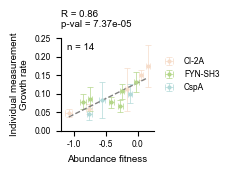

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

plt.rcParams["font.family"] = "Arial"

custom_colors = ['#F6DCC9', '#B4D689', '#B1D9D8']

DMS_tecan=DMS_tecan.sort_values('fitness')


g = sns.FacetGrid(data=DMS_tecan, hue='prot_name', aspect=2,palette=custom_colors)
g.map(plt.errorbar, 'fitness', 'Tecan_Growth_T', 'Tecan_Growth_T_std','sigma', fmt='o', elinewidth=0.5, capsize=2, capthick=0.5, markersize=2)
g.add_legend(bbox_to_anchor=(1.5,0.65), title='', fontsize=6)
g.fig.set_size_inches(1.2,1.2)
g.tick_params(axis='both', which='major', labelsize=6)

x = DMS_tecan[['fitness']].to_numpy()
y = DMS_tecan[['Tecan_Growth_T']].to_numpy()


model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.xlabel('Abundance fitness', fontsize=7)
plt.ylabel('Individual measurement\nGrowth rate', fontsize=7)
plt.annotate('R = '+str(round(r,2))+'\np-val = '+'{:0.2e}'.format(p),xy=(-1.2,0.28),fontsize=7, annotation_clip=False)
plt.annotate('n = '+str(len(x)),xy=(-1.1,0.22),fontsize=7, annotation_clip=False)
plt.xticks(np.arange(-1,0.5,0.5),np.arange(-1,0.5,0.5))
plt.yticks(np.arange(0,0.3,0.05),[f"{round(x,2):.2f}" for x in np.arange(0,0.3,0.05)])

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('Sparse_cores_DTS_Tecan.svg', dpi=300, transparent=True)

## Panel D

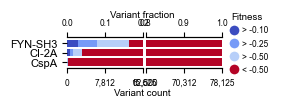

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams["font.family"] = "Arial"

prot_names = {'P06241' : 'FYN-SH3',
              'P01053' : 'CI-2A',
              'P0A9X9' : 'CspA'}

total_core_viabilities=total_core_viabilities.rename(index=prot_names)
total_core_viabilities=total_core_viabilities.reindex(list(prot_names.values()))
total_core_viabilities=total_core_viabilities.rename(columns={'variants_above_01':'> -0.10',
                                                              'variants_above_025':'> -0.25',
                                                              'variants_above_05':'> -0.50',
                                                              'variants_below_05':'< -0.50'})
total_core_viabilities=total_core_viabilities[['> -0.10','> -0.25','> -0.50','< -0.50']]

total_core_viabilities_subtract = total_core_viabilities.copy()
for index, row in total_core_viabilities_subtract.iterrows():
    total_core_viabilities_subtract.at[index,'> -0.25'] = row['> -0.25'] - row['> -0.10']
    total_core_viabilities_subtract.at[index,'> -0.50'] = row['> -0.50'] - row['> -0.25'] - row['> -0.10']
    #total_core_viabilities_subtract.at[index,'< -0.50'] = row['< -0.50'] - row['> -0.50'] - row['> -0.25'] - row['> -0.10']
    
orig_cmap = plt.cm.coolwarm
iterator_cmap+=1
#midpoint=(-0.5 - np.min(protein_variants_scaled['fitness']))/ (np.max(protein_variants_scaled['fitness']) - np.min(protein_variants_scaled['fitness']))
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.9, name='shifted'+str(iterator_cmap))

from sklearn.preprocessing import Normalizer

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 0.4), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.03}, sharey=True)


total_core_viabilities_normalized=total_core_viabilities_subtract.iloc[:,:].copy()
total_core_viabilities_normalized.iloc[:,:] = Normalizer(norm='l1').fit_transform(total_core_viabilities_normalized)
total_core_viabilities_normalized.plot.barh(stacked=True, cmap=shifted_cmap, width=0.8,ax=ax1,legend=False)
total_core_viabilities_normalized.plot.barh(stacked=True, cmap=shifted_cmap, width=0.8,ax=ax2,legend=False)

plt.gca().invert_yaxis()


ax1.spines[['left','right']].set_visible(False)
ax2.spines[['left','right']].set_visible(False)
#ax1.spines[['left','right']].set_visible(False)

ax1.set_yticks(ax1.get_yticks(),labels=ax1.get_yticklabels(),fontsize=8)
#ax2.set_yticklabels([])

ax1_top = ax1.twiny()
ax2_top = ax2.twiny()
ax1_top.set_xticks(ax1.get_xticks(),labels=ax1.get_xticklabels(),fontsize=6)
ax2_top.set_xticks(ax2.get_xticks(),labels=ax2.get_xticklabels(),fontsize=6)
ax1_top.spines[['left','right']].set_visible(False)
ax2_top.spines[['left','right']].set_visible(False)
#ax1_top.set_xlabel('Variant fraction', fontsize=7)
ax1_top.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)
ax2_top.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)
ax1_top.set_xlim(0,0.2)
ax2_top.set_xlim(0.8,1)
ax1_top.set_xticks(np.arange(0,0.25,0.1),labels=[round(i,2) for i in np.arange(0,0.25,0.1)],fontsize=6)
ax2_top.set_xticks(np.arange(0.8,1.05,0.1),labels=[round(i,2) for i in np.arange(0.8,1.05,0.1)],fontsize=6)
ax1.set_xticks(ax1.get_xticks(),labels=[int(i*5**7) for i in list(ax1.get_xticks())],fontsize=6)
ax2.set_xticks(ax2.get_xticks(),labels=[int(i*5**7) for i in list(ax2.get_xticks())],fontsize=6)
#ax1.set_xlabel('Variant count', fontsize=7)
ax1.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
ax2.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
ax1.set_xlim(0,0.2)
ax2.set_xlim(0.8,1)
ax1.set_xticks(np.arange(0,0.25,0.1),labels=[f"{int(i * 5**7):,}" for i in np.arange(0,0.25,0.1)],fontsize=6)
ax2.set_xticks(np.arange(0.8,1.05,0.1),labels=[f"{int(i * 5**7):,}" for i in np.arange(0.8,1.05,0.1)],fontsize=6)
#ax1.legend(bbox_to_anchor=[2.2,-0.85], frameon=False, fontsize=6, ncol=2)

# Remove the label of the first tick on the bottom x-axis in ax2
xticks = ax2.get_xticks()
xtick_labels = [f"{int(i * 5**7):,}" for i in xticks]
#xtick_labels[0] = ""  # Remove the first label
ax2.set_xticks(xticks, labels=xtick_labels, fontsize=6)

# Remove the label of the first tick on the top x-axis in ax2
top_xticks = ax2_top.get_xticks()
top_xtick_labels = [round(i, 2) for i in top_xticks]
#top_xtick_labels[0] = ""  # Remove the first label
ax2_top.set_xticks(top_xticks, labels=top_xtick_labels, fontsize=6)

ax2.tick_params(axis="y", left=False, labelleft=False)
ax2.tick_params(axis="y", which="minor", left=False)
ax1.tick_params(axis="y", which="minor", left=False)

# Centered x-axis labels for the entire figure
fig.text(0.5, -0.5, 'Variant count', fontsize=7, ha='center', va='center')
fig.text(0.5, 1.45, 'Variant fraction', fontsize=7, ha='center', va='center')

from matplotlib.lines import Line2D

# Define custom legend handles with circular markers
handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label,linewidth=0)
    for color, label in zip(shifted_cmap(np.linspace(0, 1, len(total_core_viabilities.columns))), total_core_viabilities.columns)
]

ax2.legend(
    handles=handles,
    bbox_to_anchor=(0.95, 0.8),  # Position to the right of the plot
    loc='center left',
    frameon=False,
    fontsize=6,
    title='Fitness',  # Legend title
    title_fontsize=7,  # Set title font size
    ncol=1,  # Single column
    handletextpad=0  # Reduce space between handles and text
)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('Sparse_core_mutant_viability_summary.svg', dpi=300, transparent=True, bbox_inches='tight')

## Panel E

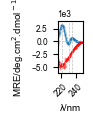

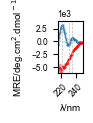

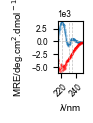

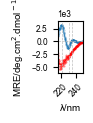

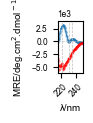

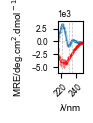

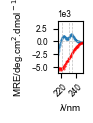

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
import numpy as np

folded_spectra = ['FYN_WT_75uM_Smooth_230906-1', 'FYN_4or1_75uM_Smooth_230906-1', 'FYN_5or3_75uM_30C_Smooth_230906-1', 'FYN_1or4_75uM_30C_Smooth_230906-1', 'FYN_9or5_75uM_Smooth_230906-1', 'FYN_21or6_75uM_30C_Smooth_230906-1', 'FYN_19or7_60uM_30C_Smooth_230906-1']
unfolded_spectra = ['FYN_WT_75uM_95C_Draft_230906-1', 'FYN_4or1_75uM_95C_Draft_230906-1', 'FYN_5or3_75uM_95C_Draft_230906-1', 'FYN_1or4_75uM_90C_Draft_230906-1', 'FYN_9or5_75uM_Draft_230906-1', 'FYN_21or6_95C_75uM_Draft_230906-1', 'FYN_19or7_60uM_95C_Draft_230906-1']
names = ['WT FLFFIIV', 'Or1 FLFFVIV', 'Or3 MLFFIVL', 'Or4 MFFFVIL', 'Or5 MMFLIVF', 'Or6 LMFMLVF', 'Or7 LMVLLVL']
concentrations = [75, 75, 75, 75, 75, 75, 60]

blank_folded = pd.read_csv(path+'Fig2/CD/BLANK_FYN-ICI2_30C_Smooth_230906-1.txt',
                  sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')

blank_folded=blank_folded.sort_values('Wavelength')
blank_folded=blank_folded.set_index('Wavelength')
blank_folded['Wavelength']=blank_folded.index

blank_unfolded = pd.read_csv(path+'Fig2/CD/BLANK_FYN-ICI2_95C_Draft_230906-1.txt',
                  sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')

blank_unfolded=blank_unfolded.sort_values('Wavelength')
blank_unfolded=blank_unfolded.set_index('Wavelength')
blank_unfolded['Wavelength']=blank_unfolded.index

for folded_spectrum, unfolded_spectrum, name, concentration in zip(folded_spectra, unfolded_spectra, names, concentrations):
    
    data = pd.read_csv(path+'Fig2/CD/'+folded_spectrum+'.txt',
                      sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')
    
    data=data.sort_values('Wavelength')
    data=data.set_index('Wavelength')
    data['Wavelength']=data.index
    
    conc_mM = concentration/1000
    protein_length = 62-1
    path_length_cm = 0.001
    
    for index, row in data.iterrows():
        data.at[index,'MRE']= (row.Ellipticity-blank_folded['Ellipticity'].loc[index])/((conc_mM*protein_length)*path_length_cm)
        
    x=data['Wavelength']
    y=data['MRE']
    y_spl = UnivariateSpline(x,y, s=5000000)
    l = x.iloc[-1]
    x_range = np.linspace(x.iloc[0],x[l-1],1000)
    
    unfolded = pd.read_csv(path+'Fig2/CD/'+unfolded_spectrum+'.txt',
                      sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')
    
    unfolded=unfolded.sort_values('Wavelength')
    unfolded=unfolded.set_index('Wavelength')
    unfolded['Wavelength']=unfolded.index
    
    for index, row in unfolded.iterrows():
        unfolded.at[index,'MRE']= (row.Ellipticity-blank_unfolded['Ellipticity'].loc[index])/((conc_mM*protein_length)*path_length_cm)
        
    x_u=unfolded['Wavelength']
    y_u=unfolded['MRE']
    y_spl_u = UnivariateSpline(x_u,y_u, s=100000000)
    
    
    fig, ax = plt.subplots(figsize=(0.33,0.67))
    plt.plot(x_range, y_spl(x_range), '-', color='#1F77B4', linewidth=0.5)
    plt.plot(x_range, y_spl_u(x_range), '-', color='red', linewidth=0.5)
    data.plot(x='Wavelength', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=0.4, color='#1F77B4', label='303K')
    unfolded.plot(x='Wavelength', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=0.4, color='red', label='368K')
    plt.axvline(235,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axvline(230,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axvline(221,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axhline(0,ls='--',color='#BDBDBD',linewidth=0.5)
    #plt.title(name)
    
    plt.xlim(215,250)
    plt.ylim(-6100,4000)
    
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax.yaxis.get_offset_text().set_font('Arial')
    ax.yaxis.get_offset_text().set_fontsize(6)
    plt.xticks(np.arange(220,260,20),fontname='Arial', fontsize=6, rotation=45)
    plt.yticks(np.arange(-5000,5000,2500),fontname='Arial', fontsize=6)
    plt.xlabel('λ/nm',fontname='Arial', fontsize=7)
    plt.ylabel('MRE/deg.cm$^2$.dmol$^-$$^1$',fontname='Arial', fontsize=7)
    
    ax.get_legend().remove()
    
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_CD_'+name+'.svg', dpi=300, transparent=True)


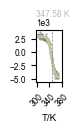

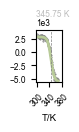

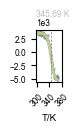

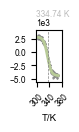

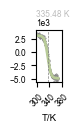

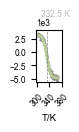

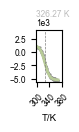

In [19]:
from scipy.optimize import curve_fit

Tramps = ['FYN_WT_Tramp_222nm-1-222nm', 'FYN_4or1_Tramp_222nm-1-222nm', 'FYN_5or3_Tramp_222nm-1-222nm', 'FYN_1or4_Tramp_222nm-1-222nm', 'FYN_9or5_Tramp_222nm-1-222nm', 'FYN_21or6_Tramp_222nm-1-222nm', 'FYN_19or7_Tramp_222nm-1-222nm']
names = ['WT FLFFIIV', 'Or1 FLFFVIV', 'Or3 MLFFIVL', 'Or4 MFFFVIL', 'Or5 MMFLIVF', 'Or6 LMFMLVF', 'Or7 LMVLLVL']
concentrations = [75, 75, 75, 75, 75, 75, 60]

blank_Tramp = pd.read_csv(path+'Fig2/CD/BLANK_FYN_ICI2_Tramp_222nm-1-222nm.txt',
                  sep='\t', header=14, names=['Temperature', 'Ellipticity', 'HT'], skipfooter=45, engine='python')


for Tramp, name, concentration in zip(Tramps, names, concentrations):
    
    data = pd.read_csv(path+'Fig2/CD/'+Tramp+'.txt',
                  sep='\t', header=14, names=['Temperature', 'Ellipticity', 'HT'], skipfooter=45, engine='python')
    
    conc_mM = concentration/1000
    protein_length = 62-1
    path_length_cm = 0.001
    
    for index, row in data.iterrows():
        data.at[index,'MRE']= (row.Ellipticity)/((conc_mM*protein_length)*path_length_cm)
        data.at[index,'Temperature']=row.Temperature+273
    
    data=data.set_index('Temperature')
    data['Temperature']=data.index
        
    x=data['Temperature']
    l = x.iloc[-1]
    y=data['MRE']
    def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
        z = L / (1 + np.exp(-k*(x-x0))) + b
        return (z)
    
    p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess
    
    popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm')
    x_range = np.linspace(x.iloc[0],x[l],1000)
    y_sig = sigmoid(x_range, *popt)
    deriv = np.diff(y_sig)/np.diff(x_range)
    
    fig, ax = plt.subplots(figsize=(0.33,0.67))
    
    data.plot(x='Temperature', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=1, color='gray')
    plt.plot(x_range, y_sig, '-', linewidth=2, color='#B8CB98')
    plt.axvline(x_range[np.argmin(deriv)],ls='--',color='gray',linewidth=0.5)
    plt.text(1.3, 1.4, str(round(x_range[np.argmin(deriv)], 2))+' K', ha='right', va='top', transform=ax.transAxes, color = '#BDBDBD', font='Arial', fontsize=6)
    
    l = x.iloc[-1]
    plt.xlim(299,373)
    plt.ylim(-5500,4100)
    
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax.yaxis.get_offset_text().set_font('Arial')
    ax.yaxis.get_offset_text().set_fontsize(6)
    plt.xticks(np.arange(300,400,40),fontname='Arial', fontsize=6, rotation=45)
    plt.yticks(np.arange(-5000,5000,2500),fontname='Arial', fontsize=6)
    plt.xlabel('T/K',fontname='Arial', fontsize=7)
    #plt.ylabel('MRE/deg.cm$^2$.dmol$^-$$^1$',fontname='Arial', fontsize=7)
    plt.ylabel('',fontname='Arial', fontsize=7)
    
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_CD_Tramp_'+name+'.svg', dpi=300, transparent=True)
